<a href="https://colab.research.google.com/github/PatrykCiwinski/Spam_detector/blob/main/SpamDetector_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB

In [ ]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2023-06-21 10:33:13--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2023-06-21 10:33:14 (11.1 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
df=pd.read_csv('spam.csv', encoding='cp437')

In [ ]:
df=df.drop(df.columns[[2,3,4]], axis=1)

In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
df.columns=[['labels','text']]

In [ ]:
y=df.pop('labels')

In [ ]:
X=df

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [ ]:
vectorizer=TfidfVectorizer()

In [ ]:
vectorizer.fit(X_train.values.ravel())
X_train=vectorizer.transform(X_train.values.ravel())
X_test=vectorizer.transform(X_test.values.ravel())
X_train=X_train.toarray()
X_test=X_test.toarray()##changing X values to numeric

In [ ]:
y.columns = y.columns.get_level_values(0)

<Axes: xlabel='labels'>

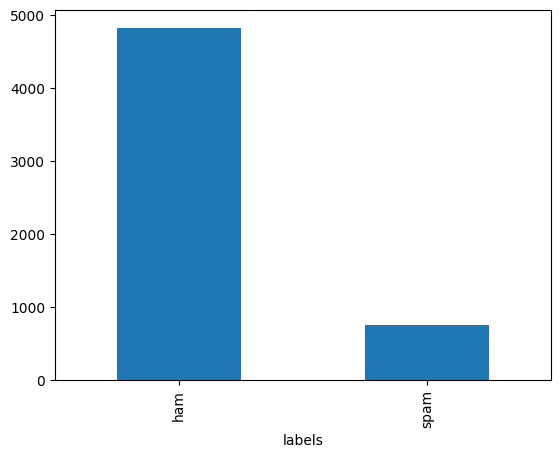

In [ ]:
y.groupby(['labels']).size().plot(kind='bar')

In [ ]:
#we have imbalance so we should oversample (SMOTE)

In [ ]:
X_resample, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [ ]:
y_resampled.columns = y_resampled.columns.get_level_values(0)

##After oversampling we have equal values in each category

<Axes: xlabel='labels'>

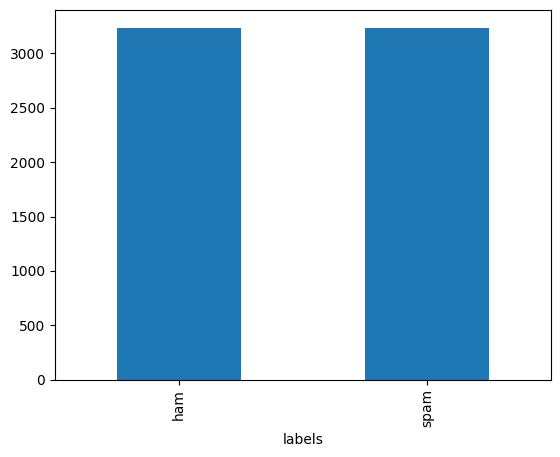

In [ ]:
y_resampled.groupby(['labels']).size().plot(kind='bar')

In [ ]:
model=MultinomialNB()#naivebayes model

In [ ]:
model.fit(X_resample,y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.98      1587
        spam       0.89      0.92      0.90       252

    accuracy                           0.97      1839
   macro avg       0.94      0.95      0.94      1839
weighted avg       0.97      0.97      0.97      1839



In [ ]:
pred_text=vectorizer.transform(['you are awesome'])

In [ ]:
model.predict(pred_text)

array(['ham'], dtype='<U4')